In [28]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

In [29]:
# Mendefiniskan nama kolom dalam dataset agar memudahkan dalam proses pengkodean
class ColumnData:
    date = 'Date'
    province = 'Province'
    island = 'Island'
    cases = 'Total Cases'
    deaths = 'Total Deaths'
    recovered = 'Total Recovered'
    actives_cases = 'Total Active Cases'
    population = 'Population'
    area = 'Area (km2)'
    mortality = 'Mortality'
    density = 'Population Density'

In [30]:
# Mendefinisikan create bins untuk splitting & binning data
def create_bins(df, columns, q=5):
    for column in columns:
        df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes

In [31]:
# Mendefinisikan normalize_data untuk normalizing data
def normalize_data(df, columns):
    minMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(d[columns])

In [32]:
# Read the data
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [33]:
# Memilih kolom yang akan digunakan
df = df[[
    ColumnData.date,
    ColumnData.province,
    ColumnData.island,
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.area,
    ColumnData.density
]]

In [34]:
# Menghapus jika ada data yang kosong
df = df.dropna(axis=0, how="any")

In [35]:
# Membuat format data pada tanggal menjadi date.
df[ColumnData.date] = pd.to_datetime(df.Date, infer_datetime_format=True).dt.date

In [36]:
# Membuat kolom baru yaitu ‘Mortality’
df[ColumnData.mortality] = df[ColumnData.deaths] / df[ColumnData.cases]

In [37]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6873 entries, 0 to 7096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6873 non-null   object 
 1   Province            6873 non-null   object 
 2   Island              6873 non-null   object 
 3   Total Cases         6873 non-null   int64  
 4   Total Deaths        6873 non-null   int64  
 5   Total Recovered     6873 non-null   int64  
 6   Total Active Cases  6873 non-null   int64  
 7   Population          6873 non-null   int64  
 8   Area (km2)          6873 non-null   int64  
 9   Population Density  6873 non-null   float64
 10  Mortality           6873 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.3+ KB


In [38]:
# Menampilkan statistik dataset
df.describe()

,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,Area (km2),Population Density,Mortality
count,6873.000000,6873.000000,6873.000000,6873.000000,6.873000e+03,6873.000000,6873.000000,6873.000000
mean,2779.033319,121.341481,1812.969300,844.722537,8.047848e+06,56314.036811,806.447297,0.051573
std,7141.692929,338.239666,5476.001679,1640.753002,1.104085e+07,60324.487321,2881.970007,0.070160
min,1.000000,0.000000,0.000000,-33.000000,6.484070e+05,664.000000,8.590000,0.000000
25%,125.000000,4.000000,40.000000,41.000000,1.999539e+06,16787.000000,47.790000,0.017338
50%,455.000000,16.000000,230.000000,170.000000,4.216171e+06,38744.000000,103.840000,0.036876
75%,2291.000000,80.000000,1277.000000,820.000000,8.217551e+06,72981.000000,262.700000,0.059660
max,86963.000000,3425.000000,71454.000000,13620.000000,4.516132e+07,319036.000000,16334.310000,1.000000


In [39]:
# Menampilkan jumlah data yang null
df.isnull().sum()

Date                  0
Province              0
Island                0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
Population            0
Area (km2)            0
Population Density    0
Mortality             0
dtype: int64

In [40]:
# Mengambil fitur yang paling bagus
df.corr()

,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,Area (km2),Population Density,Mortality
Total Cases,1.000000,0.870331,0.989123,0.872082,0.366497,-0.087531,0.473821,-0.043877
Total Deaths,0.870331,1.000000,0.852276,0.737671,0.480084,-0.095480,0.344062,0.015555
Total Recovered,0.989123,0.852276,1.000000,0.792161,0.304346,-0.084842,0.431938,-0.043913
Total Active Cases,0.872082,0.737671,0.792161,1.000000,0.480524,-0.078156,0.549881,-0.047627
Population,0.366497,0.480084,0.304346,0.480524,1.000000,-0.095469,0.140748,0.181438
Area (km2),-0.087531,-0.095480,-0.084842,-0.078156,-0.095469,1.000000,-0.214962,-0.091541
Population Density,0.473821,0.344062,0.431938,0.549881,0.140748,-0.214962,1.000000,0.036676
Mortality,-0.043877,0.015555,-0.043913,-0.047627,0.181438,-0.091541,0.036676,1.000000


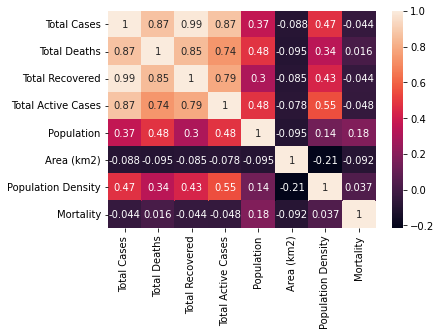

In [41]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [42]:
#selecting features  
X = df[['Total Cases','Total Active Cases', 'Population', 'Total Deaths']]  

In [43]:
# change name mortality, total_cases, total_active_cases, population, density_population, total_deaths
X = X.rename(columns={'Mortality': 'mortality', 'Total Cases': 'total_cases', 'Total Active Cases': 'total_active_cases', 'Population Density': 'density_population', 'Population': 'population', 'Total Deaths': 'total_deaths'})

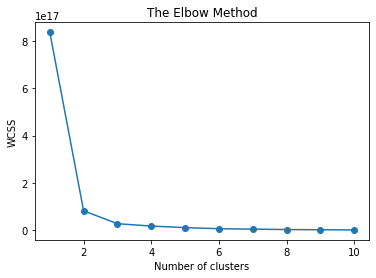

In [44]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [46]:
# Add new column to the data
X['Cluster'] = y_kmeans

In [47]:
# Show the first 5 rows of the data
X

,total_cases,total_active_cases,population,total_deaths,Cluster
0,489,430,10846145,20,2
1,491,432,10846145,20,2
3,12,2,45161325,5,1
4,493,434,10846145,20,2
6,13,2,45161325,6,1
...,...,...,...,...,...
7092,3568,1154,2635461,66,0
7093,4798,666,2641884,180,0
7094,8714,3647,5519245,174,0
7095,6776,1289,8217551,371,2


In [48]:
# Visualize the clusters
fig = px.scatter_3d(X, x='total_cases', y='total_active_cases', z='population', color='Cluster', opacity=0.7)
fig.show()

In [49]:
# cluster mean
X.groupby('Cluster').mean()

,total_cases,total_active_cases,population,total_deaths
Cluster,,,,
0,1092.625251,352.040812,3.198159e+06,35.114395
1,9730.760937,2908.470313,4.078047e+07,604.004688
2,5907.776807,1742.101668,1.056848e+07,216.646545


In [50]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))